### 1. Analyze the relationship between cholesterol levels and heart attack risk, considering additional factors such as BMI, blood pressure, triglyceride levels, and lifestyle habits. What patterns indicate a stronger correlation?

Data: https://drive.google.com/file/d/13ShLPdVJdjiCsyIuif4Ih45ZUA9Zu8Zz/view?usp=sharing

In [2]:
# To Do: Find the answer to the query using code
import pandas as pd
heart_data = pd.read_csv('/content/Heart_Attack_Male.csv')    #loading the heart_attack data
heart_data.head()

,Age,Gender,Region,Urban/Rural,SES,Smoking Status,Alcohol Consumption,Diet Type,Physical Activity Level,Screen Time (hrs/day),...,Stress Level,Blood Pressure (systolic/diastolic mmHg),Resting Heart Rate (bpm),ECG Results,Chest Pain Type,Maximum Heart Rate Achieved,Exercise Induced Angina,Blood Oxygen Levels (SpO2%),Triglyceride Levels (mg/dL),Heart Attack Likelihood
0,30,Male,East_M,Urban,Middle,Never,Regularly,Non-Vegetarian,Sedentary,3,...,High,177.0/63.1,82,Normal,Non-anginal,183,No,94.1,58,No
1,27,Male,East_M,Urban,Middle,Occasionally,Never,Vegetarian,Sedentary,6,...,Medium,177.1/90.0,106,Normal,Non-anginal,188,No,98.4,102,Yes
2,20,Male,West_M,Rural,Middle,Never,Never,Non-Vegetarian,High,2,...,High,171.5/107.1,115,Normal,Atypical,142,No,93.0,129,No
3,29,Male,East_M,Rural,High,Regularly,Never,Non-Vegetarian,Moderate,8,...,Low,176.7/110.0,118,Normal,Non-anginal,181,No,93.4,444,No
4,35,Male,West_M,Urban,High,Occasionally,Never,Non-Vegetarian,Sedentary,12,...,High,140.5/106.1,110,Normal,Asymptomatic,141,No,97.1,297,No


In [ ]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4913 entries, 0 to 4912
Data columns (total 26 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Age                                       4913 non-null   int64  
 1   Gender                                    4913 non-null   object 
 2   Region                                    4913 non-null   object 
 3   Urban/Rural                               4913 non-null   object 
 4   SES                                       4913 non-null   object 
 5   Smoking Status                            4913 non-null   object 
 6   Alcohol Consumption                       4913 non-null   object 
 7   Diet Type                                 4913 non-null   object 
 8   Physical Activity Level                   4913 non-null   object 
 9   Screen Time (hrs/day)                     4913 non-null   int64  
 10  Sleep Duration (hrs/day)            

In [18]:
'''
My assumptions are that BMI (kg/m²) , Blood Pressure (systolic/diastolic mmHg), Maximum Heart Rate Achieved, Triglyceride Levels (mg/dL),
Physical Activity Level and lifestyle habits such as Screen Time (hrs/day), Sleep Duration (hrs/day) and Stress Level contributes to heart attack risk

So I will find their correlation with Cholesterol levels
'''

heart_data1 = heart_data[['Cholesterol Levels (mg/dL)', 'BMI (kg/m²)', 'Blood Pressure (systolic/diastolic mmHg)',
                         'Triglyceride Levels (mg/dL)', 'Maximum Heart Rate Achieved','Stress Level', 'Screen Time (hrs/day)',
                         'Sleep Duration (hrs/day)','Physical Activity Level']]   #picking the above mentioned columns from the main data
heart_data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4913 entries, 0 to 4912
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Cholesterol Levels (mg/dL)                4913 non-null   int64  
 1   BMI (kg/m²)                               4913 non-null   float64
 2   Blood Pressure (systolic/diastolic mmHg)  4913 non-null   object 
 3   Triglyceride Levels (mg/dL)               4913 non-null   int64  
 4   Maximum Heart Rate Achieved               4913 non-null   int64  
 5   Stress Level                              4913 non-null   object 
 6   Screen Time (hrs/day)                     4913 non-null   int64  
 7   Sleep Duration (hrs/day)                  4913 non-null   int64  
 8   Physical Activity Level                   4913 non-null   object 
dtypes: float64(1), int64(5), object(3)
memory usage: 345.6+ KB


In [19]:
from sklearn.preprocessing import OrdinalEncoder    #Columns like Stress Level and Physical Activity Level have ordinal data, so I decided to use OrdinalEncoder so that I can customize the order

custom_order1 = ['Low', 'Medium', 'High']   #This is the order I want for Stress Level. 0,1 and 2 will be assigned to them
custom_order2 = ['Sedentary', 'Moderate', 'High']   #This is the order I want for Physical Activity Level, 0,1 and 2 will be assigned to them

encoder1 = OrdinalEncoder(categories=[custom_order1])   #Instantiating Ordinal encoder on each of the custom order
encoder2 = OrdinalEncoder(categories=[custom_order2])


'''
For the encoding below, I added .values.reshape(-1,1) because Ordinal encoder takes inputs of 2D array, so I have to reshape
'''
heart_data1['Stress Level Encoded'] = encoder1.fit_transform(heart_data1['Stress Level'].values.reshape(-1, 1))   # Encoding Stress Level

heart_data1['Physical Activity Level Encoded'] = encoder2.fit_transform(heart_data1['Physical Activity Level'].values.reshape(-1, 1)) # Encoding Physical Activity Level

heart_data1.head()

<ipython-input-19-13a3195ce9db>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heart_data1['Stress Level Encoded'] = encoder1.fit_transform(heart_data1['Stress Level'].values.reshape(-1, 1))
<ipython-input-19-13a3195ce9db>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heart_data1['Physical Activity Level Encoded'] = encoder2.fit_transform(heart_data1['Physical Activity Level'].values.reshape(-1, 1))


,Cholesterol Levels (mg/dL),BMI (kg/m²),Blood Pressure (systolic/diastolic mmHg),Triglyceride Levels (mg/dL),Maximum Heart Rate Achieved,Stress Level,Screen Time (hrs/day),Sleep Duration (hrs/day),Physical Activity Level,Stress Level Encoded,Physical Activity Level Encoded
0,148,34.4,177.0/63.1,58,183,High,3,8,Sedentary,2.0,0.0
1,137,19.0,177.1/90.0,102,188,Medium,6,7,Sedentary,1.0,0.0
2,205,15.5,171.5/107.1,129,142,High,2,5,High,2.0,2.0
3,278,21.4,176.7/110.0,444,181,Low,8,10,Moderate,0.0,1.0
4,268,30.7,140.5/106.1,297,141,High,12,9,Sedentary,2.0,0.0


In [20]:
heart_data1=heart_data1.drop(['Stress Level', 'Physical Activity Level'], axis=1)   #dropping the un encoded columns
heart_data1.head()

,Cholesterol Levels (mg/dL),BMI (kg/m²),Blood Pressure (systolic/diastolic mmHg),Triglyceride Levels (mg/dL),Maximum Heart Rate Achieved,Screen Time (hrs/day),Sleep Duration (hrs/day),Stress Level Encoded,Physical Activity Level Encoded
0,148,34.4,177.0/63.1,58,183,3,8,2.0,0.0
1,137,19.0,177.1/90.0,102,188,6,7,1.0,0.0
2,205,15.5,171.5/107.1,129,142,2,5,2.0,2.0
3,278,21.4,176.7/110.0,444,181,8,10,0.0,1.0
4,268,30.7,140.5/106.1,297,141,12,9,2.0,0.0


In [21]:
'''
Blood Pressure column contains two information, Systolic BP and Diastolic BP, so I have to split them
'''
heart_data1[['Systolic BP', 'Diastolic BP']] = heart_data1['Blood Pressure (systolic/diastolic mmHg)'].str.split('/', expand=True)
heart_data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4913 entries, 0 to 4912
Data columns (total 11 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Cholesterol Levels (mg/dL)                4913 non-null   int64  
 1   BMI (kg/m²)                               4913 non-null   float64
 2   Blood Pressure (systolic/diastolic mmHg)  4913 non-null   object 
 3   Triglyceride Levels (mg/dL)               4913 non-null   int64  
 4   Maximum Heart Rate Achieved               4913 non-null   int64  
 5   Screen Time (hrs/day)                     4913 non-null   int64  
 6   Sleep Duration (hrs/day)                  4913 non-null   int64  
 7   Stress Level Encoded                      4913 non-null   float64
 8   Physical Activity Level Encoded           4913 non-null   float64
 9   Systolic BP                               4913 non-null   object 
 10  Diastolic BP                        

In [22]:
# Converting the new columns to numeric
heart_data1['Systolic BP'] = pd.to_numeric(heart_data1['Systolic BP'], errors='coerce')
heart_data1['Diastolic BP'] = pd.to_numeric(heart_data1['Diastolic BP'], errors='coerce')
heart_data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4913 entries, 0 to 4912
Data columns (total 11 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Cholesterol Levels (mg/dL)                4913 non-null   int64  
 1   BMI (kg/m²)                               4913 non-null   float64
 2   Blood Pressure (systolic/diastolic mmHg)  4913 non-null   object 
 3   Triglyceride Levels (mg/dL)               4913 non-null   int64  
 4   Maximum Heart Rate Achieved               4913 non-null   int64  
 5   Screen Time (hrs/day)                     4913 non-null   int64  
 6   Sleep Duration (hrs/day)                  4913 non-null   int64  
 7   Stress Level Encoded                      4913 non-null   float64
 8   Physical Activity Level Encoded           4913 non-null   float64
 9   Systolic BP                               4913 non-null   float64
 10  Diastolic BP                        

In [23]:
heart_data1=heart_data1.drop('Blood Pressure (systolic/diastolic mmHg)', axis=1)  #dropping the Blood Pressure (systolic/diastolic mmHg) column
heart_data1.head()

,Cholesterol Levels (mg/dL),BMI (kg/m²),Triglyceride Levels (mg/dL),Maximum Heart Rate Achieved,Screen Time (hrs/day),Sleep Duration (hrs/day),Stress Level Encoded,Physical Activity Level Encoded,Systolic BP,Diastolic BP
0,148,34.4,58,183,3,8,2.0,0.0,177.0,63.1
1,137,19.0,102,188,6,7,1.0,0.0,177.1,90.0
2,205,15.5,129,142,2,5,2.0,2.0,171.5,107.1
3,278,21.4,444,181,8,10,0.0,1.0,176.7,110.0
4,268,30.7,297,141,12,9,2.0,0.0,140.5,106.1


In [24]:
corr = heart_data1.corr(method = 'pearson')   #Using person correlation
sorted_correlation = corr['Cholesterol Levels (mg/dL)'].abs().sort_values(ascending=False)  #Sorting the correlation in decending order
sorted_correlation


,Cholesterol Levels (mg/dL)
Cholesterol Levels (mg/dL),1.000000
Triglyceride Levels (mg/dL),0.038135
Screen Time (hrs/day),0.028010
Sleep Duration (hrs/day),0.020171
Physical Activity Level Encoded,0.013837
Stress Level Encoded,0.009464
Maximum Heart Rate Achieved,0.005863
BMI (kg/m²),0.004582
Diastolic BP,0.004404
Systolic BP,0.001893


Query 1 Answer: There are positive correlations of 0.38 and 0.028 between Cholesterol levels and TriglycerideLevels and Screen Time respectively.

### 2. Visualize how profit is distributed across different categories using a pie chart, and explode the wedge with the highest percentage of profit across all categories.

Data: https://drive.google.com/file/d/1-cCEA9WxaLbjx8MwQJUfrQOfznnE_r5k/view?usp=sharing

In [25]:
# To Do: Find the answer to the query using code
df_store = pd.read_csv('/content/Superstore (1).csv')
df_store.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


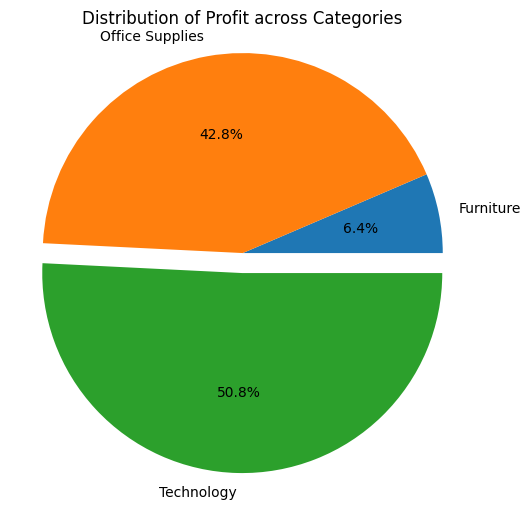

In [27]:
import matplotlib.pyplot as plt
profit_category = df_store.groupby('Category')['Profit'].sum()    #this will group the df_store data by the column Category, the calculate total profit for each category
highest_profit = profit_category.idxmax() #profit_category is a pndas series with Category as index and the values are total profit. profit_category.idxmax finds the category(index) with the highest profit

plt.figure(figsize=(6,6))
explode = [0.1 if Category == highest_profit else 0 for Category in profit_category.index]  #thisspecify the category to explode
plt.pie(profit_category, labels=profit_category.index, autopct='%1.1f%%', explode=explode, shadow=False, startangle=0)  #autopct='%1.1f%%' gives 1 decimal point and add %
plt.title('Distribution of Profit across Categories')
plt.axis('equal')  # Equal aspect ratio will ensure that pie is drawn as a circle.
plt.show()

Query 2 Answer: Technology has the highest percentage of profit of 50.8% across all categories

### 3. Visualize the global sales trends of Nintendo games over time using a line plot. How have Nintendo's sales figures evolved from the 1980s to the 2000s?

Data: https://drive.google.com/file/d/1IwbdhYcqMEf4zZH0Hfgbev9pCrpvJiGk/view?usp=sharing

In [ ]:
# To Do: Find the answer to the query using code

names = ['rank', 'name', 'platform', 'year', 'genre', 'publisher', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'global_sales'] #adding header
vg_sales = pd.read_csv('/content/vgsales_no_headers.csv', names=names, header=None) #specifying the header to be names
vg_sales.head()

,rank,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [ ]:
vg_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   rank          16598 non-null  int64  
 1   name          16598 non-null  object 
 2   platform      16598 non-null  object 
 3   year          16327 non-null  float64
 4   genre         16598 non-null  object 
 5   publisher     16540 non-null  object 
 6   na_sales      16598 non-null  float64
 7   eu_sales      16598 non-null  float64
 8   jp_sales      16598 non-null  float64
 9   other_sales   16598 non-null  float64
 10  global_sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [ ]:
vg_sales = vg_sales.dropna(subset=['year'])   #dropping null in the year column so that we can change data type

In [ ]:
vg_sales['year'] = vg_sales['year'].astype(int)   #changing the year column to integer
vg_sales.head()

,rank,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [ ]:
vg_nintendo = vg_sales[vg_sales['publisher'] == 'Nintendo'].sort_values(by='year')    #This is to extract only where the publisher is 'Nintendo' then sort by year
vg_nintendo.head()

,rank,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales
763,765,Mahjong,NES,1983,Misc,Nintendo,0.01,0.00,2.13,0.00,2.14
421,422,Baseball,NES,1983,Sports,Nintendo,0.73,0.10,2.35,0.02,3.20
1861,1863,Popeye,NES,1983,Platform,Nintendo,0.51,0.12,0.45,0.02,1.10
1809,1811,Donkey Kong,NES,1983,Platform,Nintendo,0.23,0.05,0.84,0.01,1.13
700,702,Mario Bros.,NES,1983,Platform,Nintendo,0.51,0.12,1.63,0.02,2.28


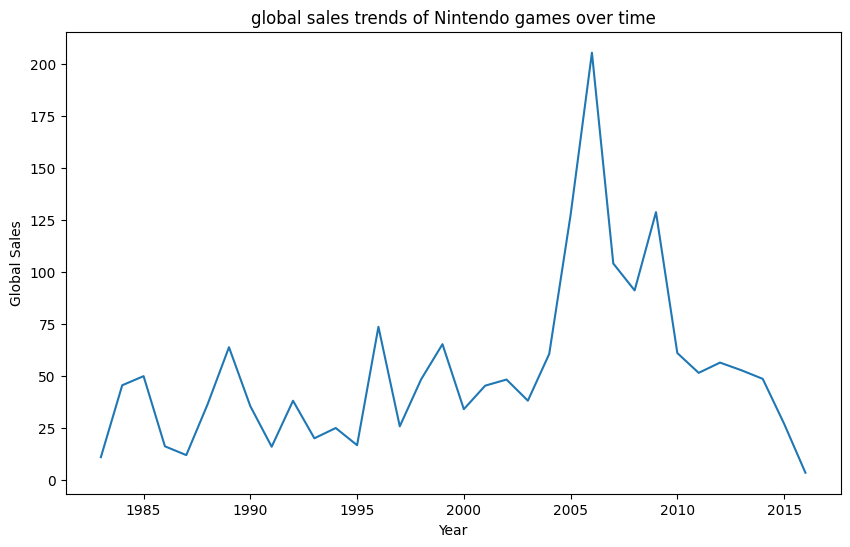

In [ ]:
'''
I will group the sum of global_sales by year
Then I will plot the line chart to see trend over time
'''
vg_nintendo_by_year = vg_nintendo.groupby('year')['global_sales'].sum()

plt.figure(figsize=(10, 6))
plt.plot(vg_nintendo_by_year.index, vg_nintendo_by_year.values)   #plot index(year) against values(Sum of global sales)
plt.xlabel('Year')
plt.ylabel('Global Sales')
plt.title('global sales trends of Nintendo games over time')
plt.grid(False)   #grid line makes it busy, so I removed it
plt.show()


Query 3 Answer: Nintendo's sales show a flunctuating but steady positive growth from 1980s to early 2000s. Then it experienced rapid growth leading to a peak value around 2006 then steady decrease in sales till 2015.

### 4. In Saudi Arabia, the 5-day workweek starts on Sunday. Analyze the impact of the weekend and weekday quote dates on the quote price.

Data: https://drive.google.com/file/d/1vROMYOn9OUrIS7ChIIzkGpjeEdxm5Pe1/view?usp=sharing

In [28]:
# To Do: Find the answer to the query using code
luxury_data = pd.read_csv('/content/luxury_goods_selling_transaction - quote_sell_dataset - luxury_goods_selling_transaction - quote_sell_dataset.csv')
luxury_data.head()

,Quote ID,Product Name,Purchased Year,Luxury Brand,Selling Platform,Quote Date,Quote Price,Sold Price,Category,Condition,Status,Payment Method
0,2842302,ALEXANDER WANG Rhinestone Mesh Mini,2019,Alexander Wang,Fashionphile,2022-11-03,300.0,300.0,handbag,Pre-owned,Completed,ACH
1,2455752,BALENCIAGA Agneau Classic Hardware City,2014,Balenciaga,Fashionphile,2022-04-27,450.0,450.0,handbag,Pre-owned,Completed,Paypal
2,2455734,BALENCIAGA Chevre Gold Metallic Edge,2013,Balenciaga,Fashionphile,2022-04-26,950.0,950.0,handbag,Pre-owned,Completed,Paypal
3,18640,Baobao Issey Miyake clutch,2020,Baobao,CoutureUSA,2022-11-16,142.5,0.0,handbag,New,Seller Declined,NaN
4,18957,Burberry Nova check tote,2016,Burberry,CoutureUSA,2022-12-05,290.0,0.0,handbag,Pre-owned,Seller Declined,NaN


In [32]:
'''
Since Saudi has weekend in Friday and Saturday, default weekday function won't work.
I have to specify which days are weekend

I am using the lambda function, which assign Weekend if the day_name is Friday or Saturday, else Weekday
'''
luxury_data['day_of_week'] = luxury_data['Quote Date'].apply(lambda x: 'Weekend' if pd.to_datetime(x).day_name() in ['Friday', 'Saturday'] else 'Weekday')
luxury_data.head()

,Quote ID,Product Name,Purchased Year,Luxury Brand,Selling Platform,Quote Date,Quote Price,Sold Price,Category,Condition,Status,Payment Method,day_of_week
0,2842302,ALEXANDER WANG Rhinestone Mesh Mini,2019,Alexander Wang,Fashionphile,2022-11-03,300.0,300.0,handbag,Pre-owned,Completed,ACH,Weekday
1,2455752,BALENCIAGA Agneau Classic Hardware City,2014,Balenciaga,Fashionphile,2022-04-27,450.0,450.0,handbag,Pre-owned,Completed,Paypal,Weekday
2,2455734,BALENCIAGA Chevre Gold Metallic Edge,2013,Balenciaga,Fashionphile,2022-04-26,950.0,950.0,handbag,Pre-owned,Completed,Paypal,Weekday
3,18640,Baobao Issey Miyake clutch,2020,Baobao,CoutureUSA,2022-11-16,142.5,0.0,handbag,New,Seller Declined,NaN,Weekday
4,18957,Burberry Nova check tote,2016,Burberry,CoutureUSA,2022-12-05,290.0,0.0,handbag,Pre-owned,Seller Declined,NaN,Weekday


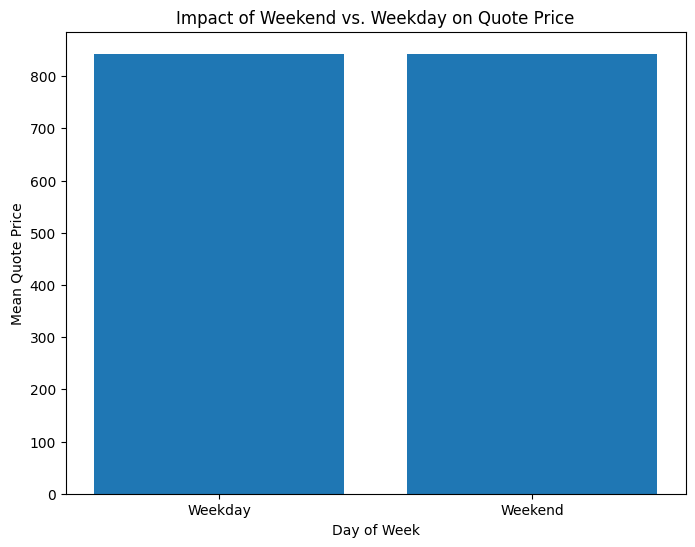

In [35]:
#I used bar chat to view if there is difference
import matplotlib.pyplot as plt

# Group data by day of the week and calculate the mean quote price
day_quote = luxury_data.groupby('day_of_week')['Quote Price'].mean()

# Creating the bar chart
plt.figure(figsize=(8, 6))
plt.bar(day_quote.index, day_quote.values)
plt.xlabel('Day of Week')
plt.ylabel('Mean Quote Price')
plt.title('Impact of Weekend vs. Weekday on Quote Price')
plt.show()


<ipython-input-58-695f7697642d>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='day_of_week', y='Quote Price', data=df, palette='coolwarm')


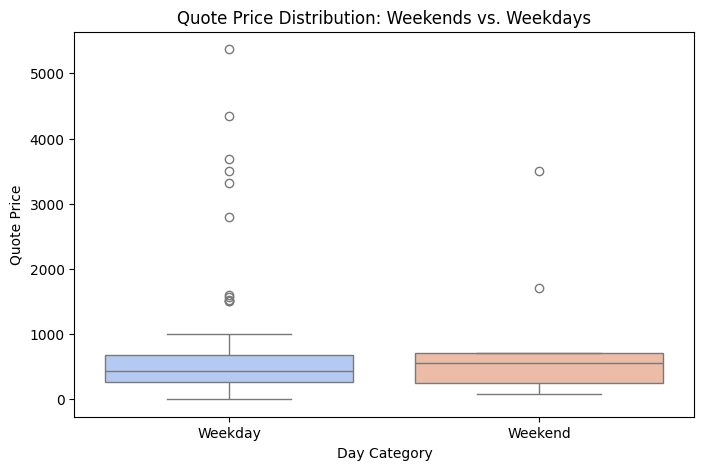

In [ ]:
'''
I didn't see difference in the means with the bar chart so I will use boxplot
'''

import seaborn as sns

# Plot boxplot to compare Quote Prices
plt.figure(figsize=(8, 5))
sns.boxplot(x='day_of_week', y='Quote Price', data=luxury_data, palette='coolwarm')
plt.title('Quote Price Distribution: Weekends vs. Weekdays')
plt.xlabel('Day Category')
plt.ylabel('Quote Price')
plt.show()


In [ ]:
'''
For more analysis, i will use statistical t test
'''

from scipy.stats import ttest_ind

#Hnul: There is no difference in impact
# Halpha: There is difference impact

# Extract quote prices for both groups
weekend_prices = luxury_data[luxury_data['day_of_week'] == 'Weekend']['Quote Price']
weekday_prices = luxury_data[luxury_data['day_of_week'] == 'Weekday']['Quote Price']

# Perform an independent t-test
t_stat, p_value = ttest_ind(weekend_prices, weekday_prices, nan_policy='omit')

print(f"T-statistic: {t_stat}, P-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("There is a significant difference in impact on quote prices between weekends and weekdays.")
else:
    print("No significant difference in impact on quote prices between weekends and weekdays.")


T-statistic: 0.0023757310395865726, P-value: 0.9981118324714302
No significant difference in impact on quote prices between weekends and weekdays.


Query 4 Answer: from the boxplot, there is no clear difference between the impact of weekend and weekday quote dates on the quote price. Same with the statistical t test.